[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a. black or white

b. age

c. age

d. cost




**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

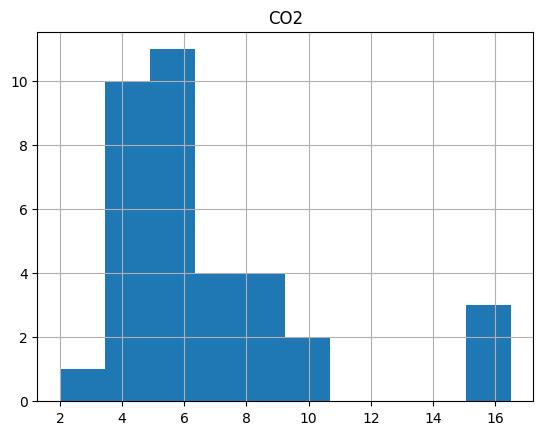

In [3]:
carbon_west.hist(column="CO2")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [4]:
carbon_west.describe()

,CO2
count,35.000000
mean,6.717143
std,3.356949
min,2.000000
25%,4.450000
50%,5.900000
75%,8.000000
max,16.500000


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [5]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [6]:
import numpy as np
#print(murders.head(51))
murders_no_dc = murders.drop([50])
mean_no_dc = np.mean(murders_no_dc['murder'])
std_no_dc = np.std(murders_no_dc['murder'])
print(f"Mean murders without DC: {mean_no_dc}")
print(f"Standard deviation of murders without DC: {std_no_dc}")

Mean murders without DC: 4.874
Standard deviation of murders without DC: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [7]:
min_no_dc = np.min(murders_no_dc['murder'])
q1_no_dc = np.percentile(murders_no_dc['murder'], 25)
median_no_dc = np.median(murders_no_dc['murder'])
q3_no_dc = np.percentile(murders_no_dc['murder'], 75)
max_no_dc = np.max(murders_no_dc['murder'])
print(f"Minimum murders without DC: {min_no_dc}")
print(f"1st quartile murders without DC: {q1_no_dc}")
print(f"Median murders without DC: {median_no_dc}")
print(f"3rd quartile murders without DC: {q3_no_dc}")
print(f"Maximum murders without DC: {max_no_dc}")

Minimum murders without DC: 1.0
1st quartile murders without DC: 2.625
Median murders without DC: 4.85
3rd quartile murders without DC: 6.175
Maximum murders without DC: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [8]:
print(f"Mean murders w/ DC: {np.mean(murders['murder'])}")
print(f"Median murders w/ DC: {np.median(murders['murder'])}")
print(f"Minimum murders w/ DC: {np.min(murders['murder'])}")
print(f"1st quartile murders w/ DC: {np.percentile(murders['murder'], 25)}")
print(f"Median murders w/ DC: {np.median(murders['murder'])}")
print(f"3rd quartile murders w/ DC: {np.percentile(murders['murder'], 75)}")
print(f"Maximum murders w/ DC: {np.max(murders['murder'])}")

# The mean is more affected by the outlier than the median
# The range is more affected by the outlier than the interquartile range

Mean murders w/ DC: 5.252941176470588
Median murders w/ DC: 5.0
Minimum murders w/ DC: 1.0
1st quartile murders w/ DC: 2.6500000000000004
Median murders w/ DC: 5.0
3rd quartile murders w/ DC: 6.45
Maximum murders w/ DC: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [9]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
print(houses.head())

   case   price  size  new  taxes  bedrooms  baths
0     1  419.85  2048    0   3104         4      2
1     2  219.75   912    0   1173         2      1
2     3  356.55  1654    0   3076         4      2
3     4  300.00  2068    0   1608         3      2
4     5  239.85  1477    0   1454         3      3


Part a. Construct a scatterplot between square feet and price of a home.

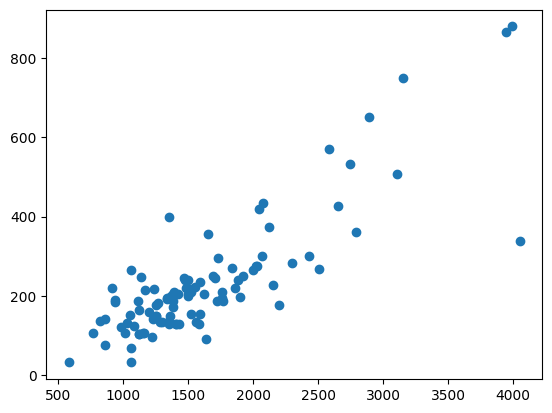

In [10]:
sqfeet = houses['size']
price = houses['price']
plt.scatter(sqfeet, price)
plt.show()

Part b. Find the correlation between the two variables.

In [11]:
houses.corr()

# The r value between price and size is 0.83, which is strong

,case,price,size,new,taxes,bedrooms,baths
case,1.000000,-0.160177,-0.053307,0.041632,-0.021201,-0.011823,0.051479
price,-0.160177,1.000000,0.833785,0.473261,0.841980,0.393957,0.558253
size,-0.053307,0.833785,1.000000,0.384328,0.818796,0.544783,0.658225
new,0.041632,0.473261,0.384328,1.000000,0.380874,0.049316,0.251481
taxes,-0.021201,0.841980,0.818796,0.380874,1.000000,0.473929,0.594854
bedrooms,-0.011823,0.393957,0.544783,0.049316,0.473929,1.000000,0.492222
baths,0.051479,0.558253,0.658225,0.251481,0.594854,0.492222,1.000000


Part c. Find and plot the regression line on top of the scatterplot.

Slope: [0.18989117]
Intercept: -76.3893821074686


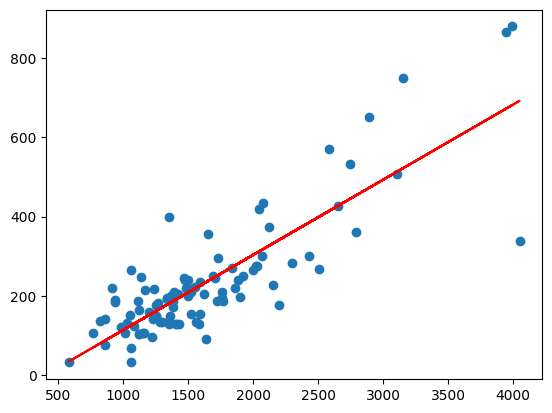

In [12]:
from sklearn.linear_model import LinearRegression
x = houses['size']
y = houses['price']
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
slope = model.coef_
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color='red')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

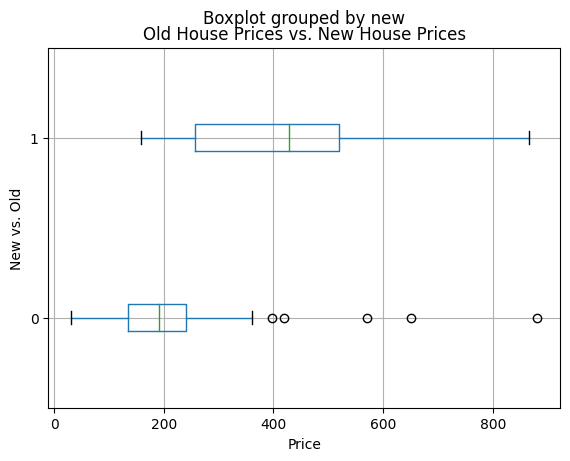

In [13]:
old_houses = houses[houses['new'] == 0]
new_houses = houses[houses['new'] == 1]

houses.boxplot(column='price', by='new', vert=False)
plt.title("Old House Prices vs. New House Prices")
plt.xlabel("Price")
plt.ylabel("New vs. Old")
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a very strong positive relationship between size and price, with an R value of 0.83. The bigger a house is, the more likely it is to be more expensive. The positive slope also shows that there is a positive relationship between size and price.

There is also a very strong positive relationship between price and whether or not a house is new. The median price for new houses is more than twice the median price for old houses, and every other feature for the new homes is priced higher than the old homes. For example, the minimum, 1st quartile, median, 3rd quartile, and maximum prices are all greater for the new homes vs. the old homes (excluding outliers).



**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [14]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
print(happy.head())

   subject happiness marital gender
0        1   1     1    male    NaN
1        2   1     1    male    NaN
2        3   1     1    male    NaN
3        4   1     1    male    NaN
4        5   1     1    male    NaN


In [16]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
